Build Feedforward neural networks with Keras and TensorFlow for classification of
CIFAR10 image dataset using the following steps:<br>
a. Import the necessary packages<br>
b. Load the training and testing data<br>
c. Define the network architecture using Keras<br>
d. Train the model using SGD/Adam optimizer<br>
e. Evaluate the network<br>
f. Plot the training loss and accuracy<br>

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

In [2]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

[INFO] loading CIFAR-10 data...


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [4]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

[INFO] training network...
Epoch 1/10
1563/1563 [==============================] - 116s 72ms/step - loss: 1.8366 - accuracy: 0.3463 - val_loss: 1.7391 - val_accuracy: 0.3749
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6492 - accuracy: 0.4167 - val_loss: 1.5829 - val_accuracy: 0.4394
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5713 - accuracy: 0.4476 - val_loss: 1.6316 - val_accuracy: 0.4128
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5104 - accuracy: 0.4671 - val_loss: 1.5945 - val_accuracy: 0.4450
Epoch 5/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4633 - accuracy: 0.4842 - val_loss: 1.4674 - val_accuracy: 0.4788
Epoch 6/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4203 - accuracy: 0.4988 - val_loss: 1.4541 - val_accuracy: 0.4860
Epoch 7/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.3860 - acc

In [6]:
# evaluate the network
print("[INFO] evaluating network...")
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 8s 25ms/step
              precision    recall  f1-score   support

    airplane       0.43      0.67      0.52      1000
  automobile       0.35      0.88      0.50      1000
        bird       0.37      0.45      0.40      1000
         cat       0.45      0.18      0.26      1000
        deer       0.57      0.21      0.31      1000
         dog       0.49      0.32      0.39      1000
        frog       0.66      0.44      0.53      1000
       horse       0.49      0.59      0.54      1000
        ship       0.72      0.47      0.57      1000
       truck       0.54      0.40      0.46      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



<Figure size 432x288 with 0 Axes>

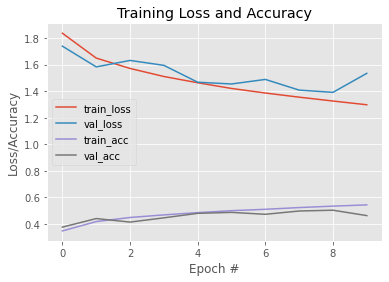

<Figure size 432x288 with 0 Axes>

In [7]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.legend()
plt.figure()